In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target

In [6]:
df['flower_name'] = df['target'].apply(lambda x : iris.target_names[x])

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [8]:
df0 = df[df['target']==0]
df1 = df[df['target']==1]
df2 = df[df['target']==2]

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

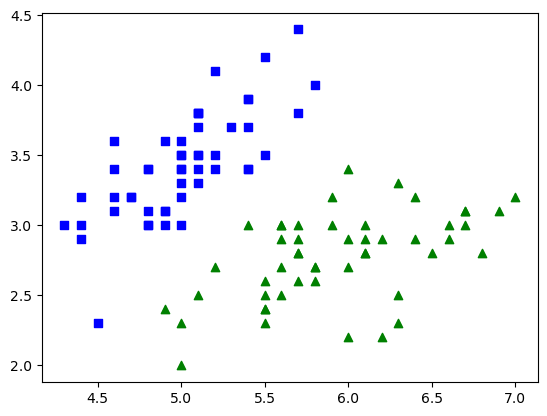

In [10]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='blue',marker='s')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green',marker='^')

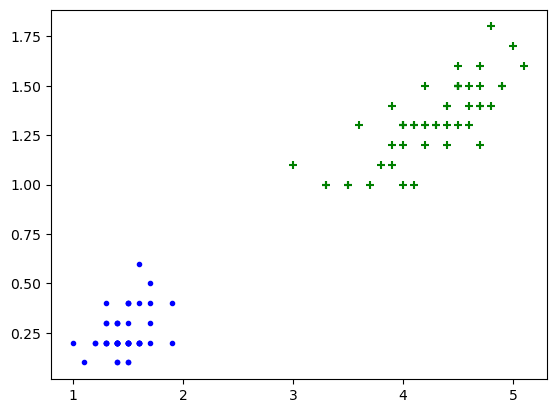

In [11]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='blue',marker='.')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green',marker='+')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(['target', 'flower_name'], axis = 1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
sv = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [15]:
lr.fit(X_train, y_train)
sv.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits = 5, test_size = .2, random_state = 0)

from sklearn.model_selection import cross_val_score

In [17]:
import numpy as np
model = [lr, sv, dt, rf]

for m in model:
    score = cross_val_score(m, X, y, cv=ss)
    print(np.mean(score))

/home/meetspar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meetspar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

0.9666666666666668
0.9533333333333334
0.9533333333333334
0.9533333333333334


In [22]:

def predict_flower(sepal_len, sepal_wid, petal_len, petal_wid):
    x = np.zeros(len(X.columns))
    x[0] = sepal_len
    x[1] = sepal_wid
    x[2] = petal_len
    x[3] = petal_wid
    
    return iris.target_names[lr.predict([x])[0]]

In [25]:
print(predict_flower(6.7, 3.0, 5.2, 2.3))

virginica


/home/meetspar/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
